### 1. To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.


Text(0.5, 1.0, '3 level')

<Figure size 1000x600 with 0 Axes>

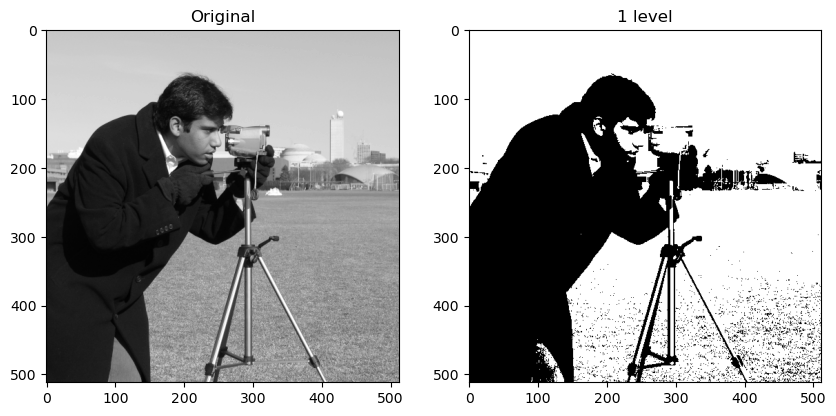

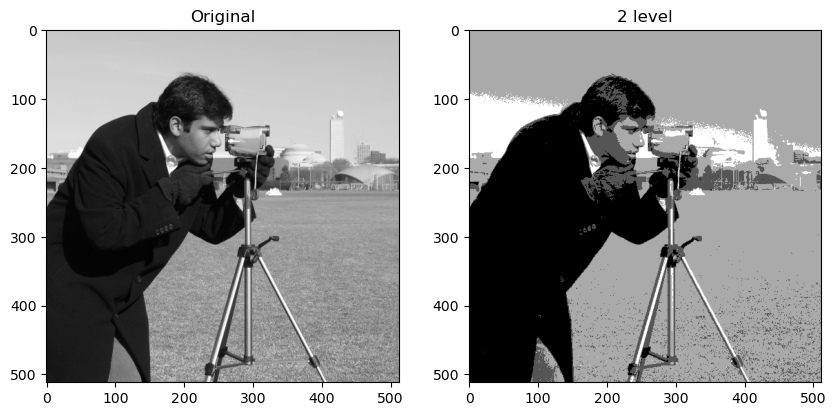

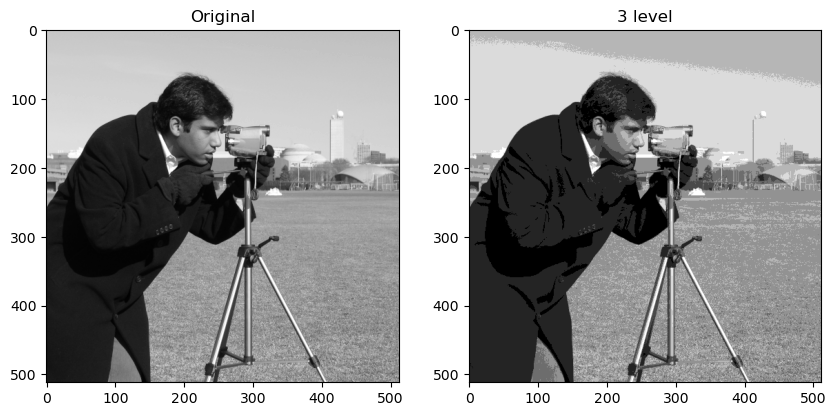

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage import data as images

def reduce_intencity(image,level):
    #caluclate steps
    steps = pow(2,level)-1
    reduced_image = np.zeros_like(image, dtype=np.uint8)
    
    #change intensity in each picell
    for index,intensity in np.ndenumerate(image):
        reduced_image[index]= round(intensity/255 * steps)
        
    return reduced_image


plt.gray()
image = images.camera()

f,arr = plt.subplots(1,2)
arr[0].imshow(image)
arr[0].set_title('Original')
reduced_image=reduce_intencity(image,1)
arr[1].imshow(reduced_image)
arr[1].set_title('1 level')

f,arr = plt.subplots(1,2)
arr[0].imshow(image)
arr[0].set_title('Original')
reduced_image=reduce_intencity(image,2)
arr[1].imshow(reduced_image)
arr[1].set_title('2 level')


f,arr = plt.subplots(1,2)
arr[0].imshow(image)
arr[0].set_title('Original')
reduced_image=reduce_intencity(image,3)
arr[1].imshow(reduced_image)
arr[1].set_title('3 level')

### 2. Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood.

Text(0.5, 1.0, '20*20')

<Figure size 1000x600 with 0 Axes>

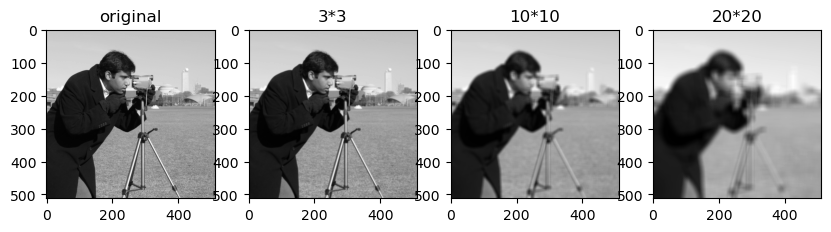

In [227]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data
image = data.camera()


plt.gray()


f,arr = plt.subplots(1,4)
image_3 = cv.blur(image,(3,3))
image_10 = cv.blur(image,(10,10))
image_20 = cv.blur(image,(20,20))


arr[0].imshow(image)
arr[0].set_title('original')

arr[1].imshow(image_3)
arr[1].set_title('3*3')

arr[2].imshow(image_10)
arr[2].set_title('10*10')

arr[3].imshow(image_20)
arr[3].set_title('20*20')

### 3. Rotate an image by 45 and 90 degrees

Text(0.5, 1.0, 'Rotated\xa0by\xa090 degree')

<Figure size 1000x600 with 0 Axes>

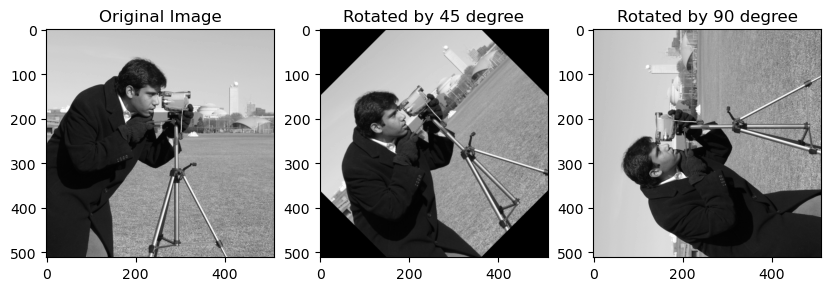

In [209]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data

image = data.camera()
height,width = image.shape

center = (height//2,width//2)

plt.gray()
plt.rcParams['figure.figsize']=(10,6)
f,arr = plt.subplots(1,3)

#rotate by 45 degree
rotation_matrix_1 = cv.getRotationMatrix2D(center,45,1.0)
rotated_image_45 = cv.warpAffine(image,rotation_matrix_1,(height,width))

#rotate by 90 degree

rotated_image_90 = cv.rotate(image,rotateCode=2)


arr[0].imshow(image)
arr[0].set_title('Original Image')
arr[1].imshow(rotated_image_45)
arr[1].set_title('Rotated by 45 degree')
arr[2].imshow(rotated_image_90)
arr[2].set_title('Rotated by 90 degree')

### 4. For every 3×3 block of the image (without overlapping), replace all corresponding 9pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.


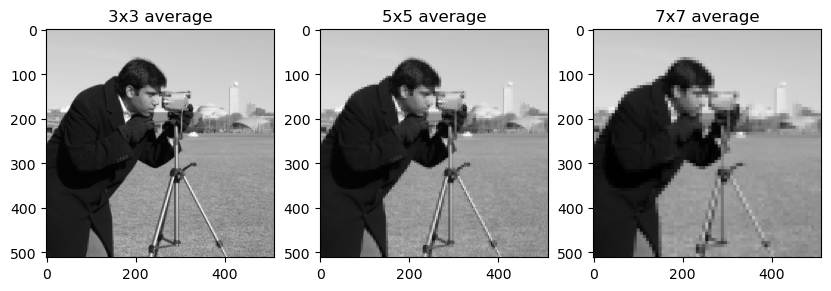

In [216]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data
image = data.camera()

def reduce_resolution(image,block_size):
    rows,cols = image.shape
    im_mod = image.copy()
    for r in range(block_size//2,rows,block_size):
        for c in range(S//2,cols,S):
            im_mod[r-block_size//2:r+S//2+1,c-block_size//2:c+block_size//2+1] = np.average(image[r-block_size//2:r+block_size//2+1,c-block_size//2:c+block_size//2+1])
            
    return im_mod     
            

stride = [3,5,7]
f,arr = plt.subplots(1, len(stride))

for index,bolck_size in enumerate(stride):
    img = reduce_resolution(image,bolck_size)
    arr[index].imshow(img);
    arr[index].set_title('{}x{} average'.format(bolck_size,bolck_size))
    
